In [1]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np

In [2]:
x_lin = [0, 1, 1, 4, 7]
y_lin = [-1, 1, 2, 3, 4]

x_sqr = [-1, -1, 0, 1, 2]
y_sqr = [3, 4, 4, 1, -2]

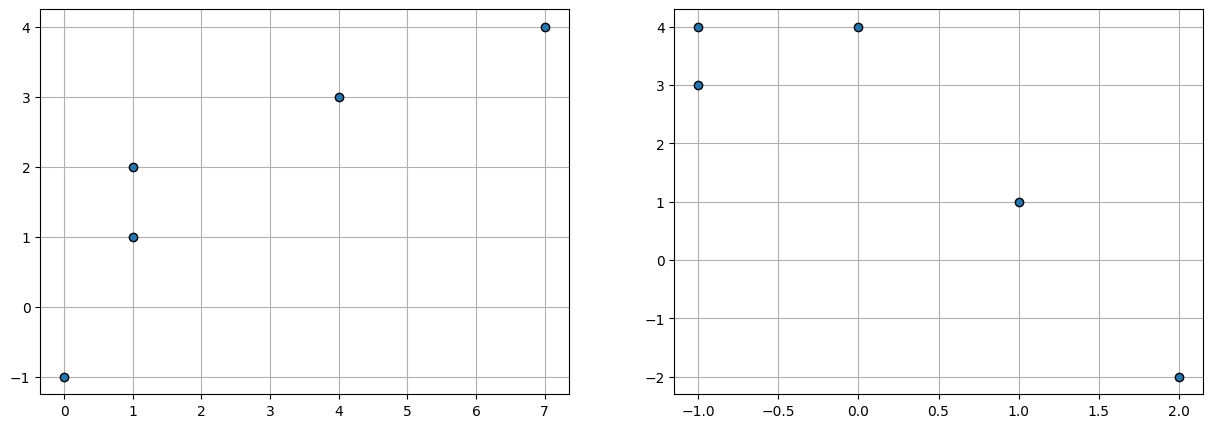

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(x_lin, y_lin, edgecolor="black", zorder=3)
ax[1].scatter(x_sqr, y_sqr, edgecolor="black", zorder=3)

ax[0].grid()
ax[1].grid()

In [4]:
x, a, b = sp.symbols("x a b")

In [5]:
f_lin = a * x + b
f_lin

a*x + b

In [6]:
def phi(func, x_, y):
	return (y - (func.subs(x, x_))) ** 2

In [7]:
def f_diff(func, p):
	return func.diff(p)

In [8]:
def get_funcs(func, x_data, y_data, coef):
	funcs = []
	for p in coef:
		
		res = 0
		for x_coord, y_coord in zip(x_data, y_data):
			phi_ = phi(func, x_coord, y_coord)
			phi_diff = f_diff(phi_, p)
			res += phi_diff
		
		funcs += [res]
	
	return funcs

In [9]:
funcs_lin = get_funcs(f_lin, x_lin, y_lin, [a, b])
funcs_lin

[134*a + 26*b - 86, 26*a + 10*b - 18]

In [10]:
coef = sp.solve(funcs_lin)
coef

{a: 49/83, b: 22/83}

In [11]:
def f(func, x_data, coef):
	func = func.subs(coef)
	return [func.subs(x, x_) for x_ in x_data]

In [12]:
x_data_lin = np.linspace(min(x_lin) - 3, max(x_lin) + 3, 100)
y_data_lin = f(f_lin, x_data_lin, coef)

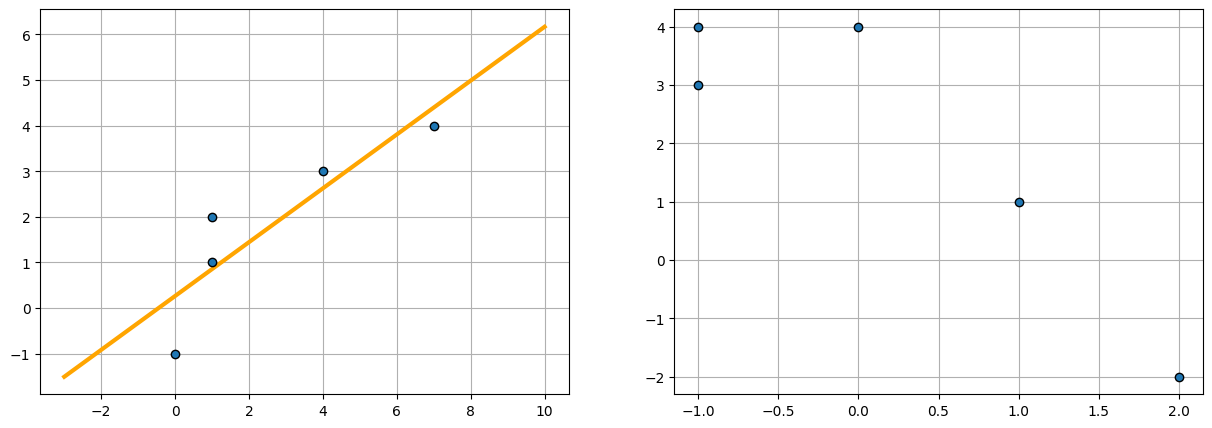

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(x_lin, y_lin, edgecolor="black", zorder=3)
ax[0].plot(x_data_lin, y_data_lin, c="orange", lw=3)

ax[1].scatter(x_sqr, y_sqr, edgecolor="black", zorder=3)

ax[0].grid()
ax[1].grid()

In [14]:
a, b, c, x = sp.symbols("a b c x")

In [15]:
f_sqr = a * x ** 2 + x * b + c
f_sqr

a*x**2 + b*x + c

In [16]:
funcs_sqr = get_funcs(f_sqr, x_sqr, y_sqr, [a, b, c])
funcs_sqr

[38*a + 14*b + 14*c, 14*a + 14*b + 2*c + 20, 14*a + 2*b + 10*c - 20]

In [17]:
coef = sp.solve(funcs_sqr)
coef

{a: -35/39, b: -40/39, c: 45/13}

In [18]:
x_data_sqr = np.linspace(min(x_sqr) - 3, max(x_sqr) + 3, 100)
y_data_sqr = f(f_sqr, x_data_sqr, coef)

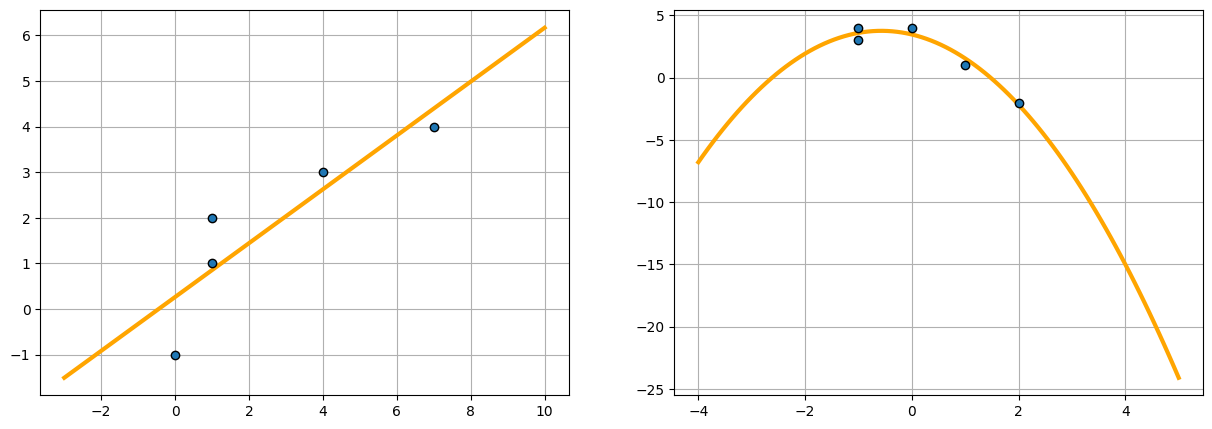

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(x_lin, y_lin, edgecolor="black", zorder=3)
ax[0].plot(x_data_lin, y_data_lin, c="orange", lw=3)

ax[1].scatter(x_sqr, y_sqr, edgecolor="black", zorder=3)
ax[1].plot(x_data_sqr, y_data_sqr, c="orange", lw=3)

ax[0].grid()
ax[1].grid()